In [1]:
%matplotlib inline

**Its just a Hadamard gate followed by measurement**

**Interpretation 1:**
Hadamard gate created superposition
Measurement collapses this into either ket(0) and ket(1) each with 50% probability.  so from this the quantum principles like superposition, collapse and randomness can be learned.

**Interpretation 2:**
Treat 0 as Heads and 1 as Tails.
Hadamard + measurement behaves like a fair coin: Heads = 50%, Tails = 50%. So here the quantum mechanics is used to simulated a random coin toss.

In [2]:
!pip install qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.5 MB/s eta 0:00:00


In [3]:
!pip install pylatexenc --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [4]:
import qiskit

In [5]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_vector, circuit_drawer
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

**IBM QISKIT CODE**

Quantum Circuit:


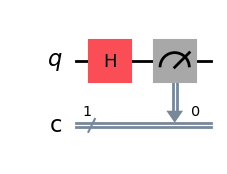

Measurement Result (Probability Distribution): {'1': 489, '0': 511}


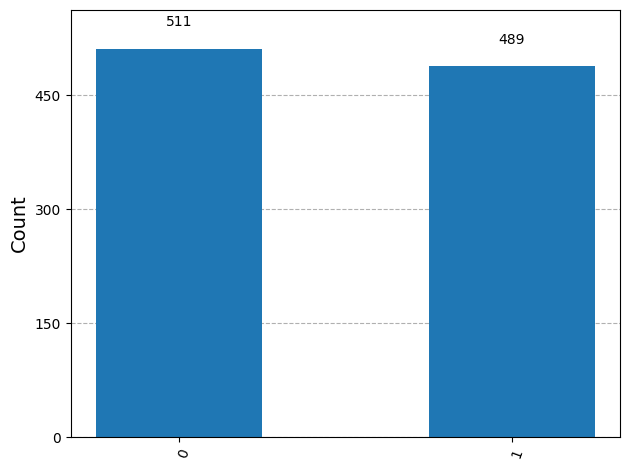

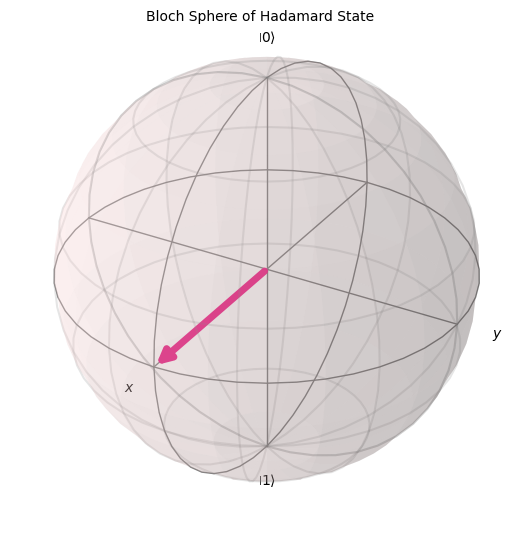

In [6]:
qc=QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)

simulator = AerSimulator()
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts()

print("Quantum Circuit:")
display(qc.draw(output='mpl'))

print("Measurement Result (Probability Distribution):", counts)
hist_fig = plot_histogram(counts)
display(hist_fig)

qc_bloch = QuantumCircuit(1)
qc_bloch.h(0)

state = Statevector.from_instruction(qc_bloch)
amplitudes = state.data

# |ψ⟩ = a|0⟩ + b|1⟩, where a and b are complex amplitudes
a = amplitudes[0]
b = amplitudes[1]

x = 2 * (a.conjugate() * b).real
y = 2 * (a.conjugate() * b).imag
z = abs(a)**2 - abs(b)**2

bloch_vector = [x, y, z]

bloch_fig = plot_bloch_vector(bloch_vector, title="Bloch Sphere of Hadamard State")
display(bloch_fig)

**BLOCH SPHERE REPRESENTATION**

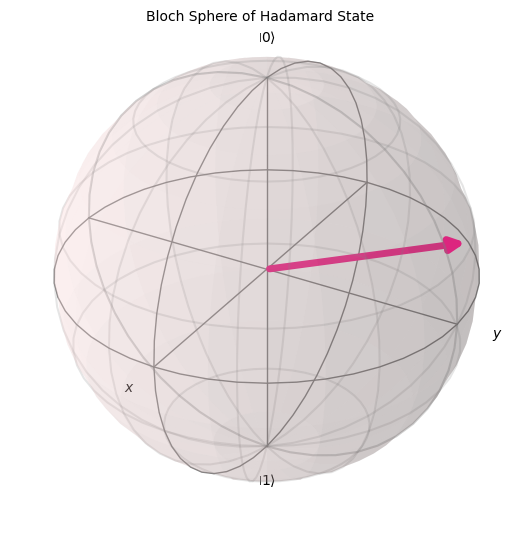

In [ ]:

theta = np.pi/2      # Move to equator
phi = 3*np.pi/4      # Rotate around Z (135 degrees)

qc_bloch = QuantumCircuit(1)
qc_bloch.s(0)
qc_bloch.z(0)
qc_bloch.ry(theta, 0)
qc_bloch.rz(phi, 0)

state = Statevector.from_instruction(qc_bloch)
amplitudes = state.data

# Step 3: Compute Bloch vector manually
# |ψ⟩ = a|0⟩ + b|1⟩, where a and b are complex amplitudes
a = amplitudes[0]
b = amplitudes[1]

# Calculate x, y, z components of the Bloch vector
x = 2 * (a.conjugate() * b).real
y = 2 * (a.conjugate() * b).imag
z = abs(a)**2 - abs(b)**2

bloch_vector = [x, y, z]

# Step 4: Plot Bloch Sphere
bloch_fig = plot_bloch_vector(bloch_vector, title="Bloch Sphere of Hadamard State")
display(bloch_fig)


**PENNYLANE CODE**

In [7]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 77.6 MB/s eta 0:00:00


In [8]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/pennylane/devices/device_api.py:193: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(


Measurement Result (Probability Distribution): {'0': 495, '1': 505}


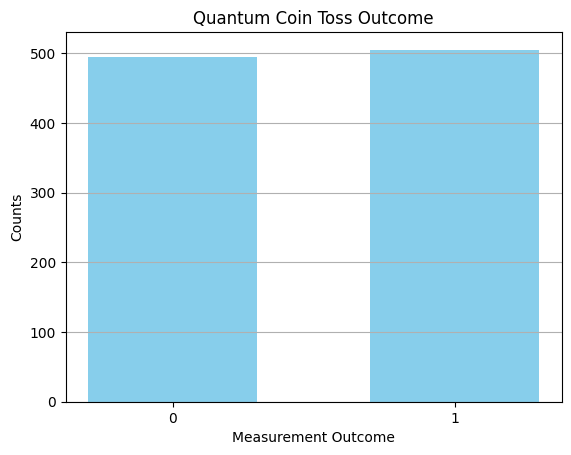

Bloch Vector: [np.float64(0.9999999999999998), np.float64(0.0), np.float64(0.0)]


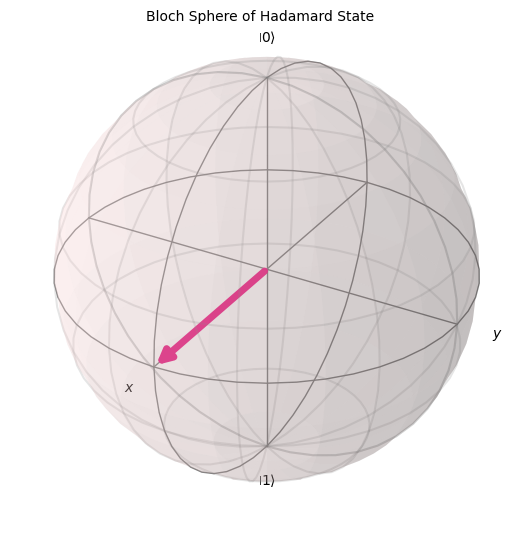

In [9]:

dev = qml.device("default.qubit", wires=1, shots=1000)

@qml.qnode(dev)
def quantum_coin_toss():
    qml.Hadamard(wires=0)
    return qml.sample(qml.PauliZ(0)) # pauliZ is the default observable for measurement in PennyLane


samples = quantum_coin_toss()


outcomes = (1 - samples) // 2  # +1 → 0, -1 → 1

counts = {"0": int((outcomes == 0).sum()), "1": int((outcomes == 1).sum())}


print("Measurement Result (Probability Distribution):", counts)
plt.hist(outcomes, bins=[-0.5, 0.5, 1.5], rwidth=0.6, align='mid', color='skyblue')
plt.xticks([0, 1])
plt.xlabel("Measurement Outcome")
plt.ylabel("Counts")
plt.title("Quantum Coin Toss Outcome")
plt.grid(axis='y')
plt.show()

dev2 = qml.device("default.qubit", wires=1)

@qml.qnode(dev2)
def bloch_state():
    qml.Hadamard(wires=0)
    return qml.state()

state = bloch_state()
a = state[0]
b = state[1]

x = 2 * (np.real(np.conj(a) * b))
y = 2 * (np.imag(np.conj(a) * b))
z = abs(a)**2 - abs(b)**2

bloch_vector = [x, y, z]
print("Bloch Vector:", bloch_vector)

from mpl_toolkits.mplot3d import Axes3D
from qiskit.visualization import plot_bloch_vector  # We reuse this function
bloch_fig = plot_bloch_vector(bloch_vector, title="Bloch Sphere of Hadamard State")
display(bloch_fig)


**GOOGLE CIRQ CODE**

In [10]:
!pip install cirq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.8/670.8 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.5/430.5 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 75.8 MB/s eta 0:00:00


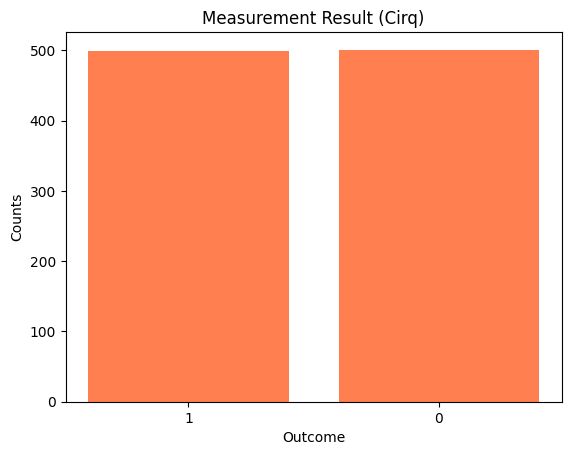

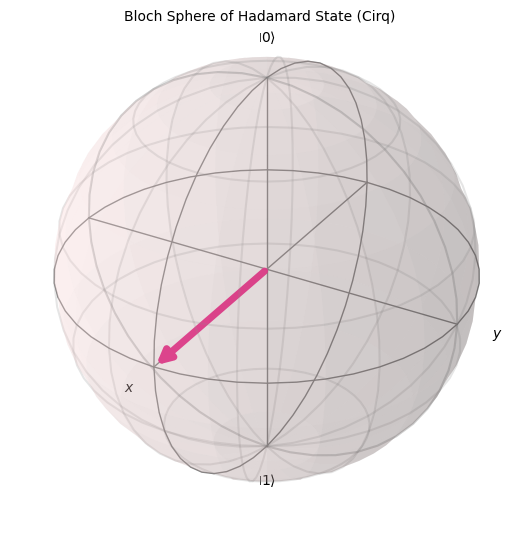

In [11]:

import cirq
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

qubit = cirq.LineQubit(0)
circuit = cirq.Circuit()
circuit.append(cirq.H(qubit))
circuit.append(cirq.measure(qubit, key='m'))

simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)
counts = dict(Counter(result.measurements['m'][:, 0]))
counts = {str(k): v for k, v in counts.items()}

plt.bar(counts.keys(), counts.values(), color='coral')
plt.title("Measurement Result (Cirq)")
plt.xlabel("Outcome")
plt.ylabel("Counts")
plt.show()

circuit_bloch = cirq.Circuit(cirq.H(qubit))
result = simulator.simulate(circuit_bloch)
state_vector = result.final_state_vector

a, b = state_vector[0], state_vector[1]
x = 2 * np.real(np.conj(a) * b)
y = 2 * np.imag(np.conj(a) * b)
z = abs(a)**2 - abs(b)**2

from qiskit.visualization import plot_bloch_vector
bloch_fig = plot_bloch_vector([x, y, z], title="Bloch Sphere of Hadamard State (Cirq)")
display(bloch_fig)
